# Detecting Bias in "Fandango Movie Ratings"

In [1]:
import pandas as pd
reviews=pd.read_csv('fandango_scores.csv')
reviews.info()
norm_reviews=reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
norm_reviews.info()
print(norm_reviews[:1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

### Vertical Bars

[4.3  3.55 3.9  4.5  5.  ]


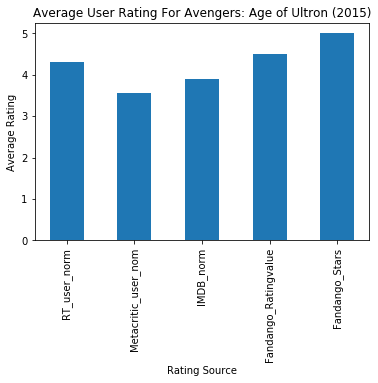

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
print(bar_heights)
bar_positions = arange(5) + 1
fig, ax = plt.subplots()
ax.bar(bar_positions,bar_heights,width=0.5)
tick_positions=range(1,6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols,rotation=90)
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Horizontal Bars

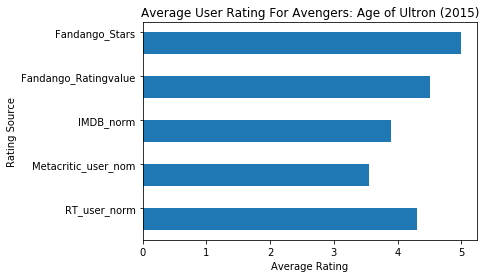

In [3]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.barh(bar_positions,bar_widths,height=0.5)
tick_positions=range(1,6)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Scatter Plot

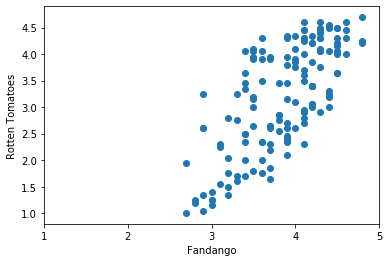

In [4]:
fig,ax=plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
tick_positions=range(1,6)
ax.set_xticks(tick_positions)
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

### Reversing Axes

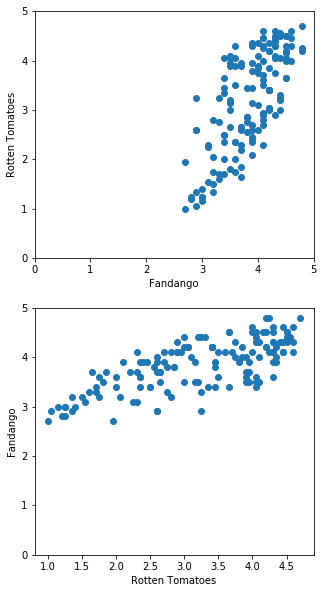

In [5]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
tick_positions=range(0,6)
ax1.set_xticks(tick_positions)
ax1.set_yticks(tick_positions)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'],norm_reviews['Fandango_Ratingvalue'])
ax2.set_yticks(tick_positions)
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

***Above indicates weak correlation as values are increasing on both axis. But Fandango clearly gives more favourable ratings as compared to Rotten Tomatoes.***

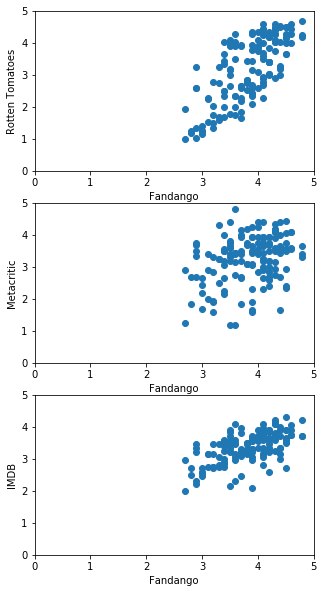

In [6]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['Metacritic_user_nom'])
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax3.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['IMDB_norm'])
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
plt.show()

***From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.
The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot.***

## Histograms and Box Plots 

In [16]:
fandango_distribution=norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index(ascending=True)
imdb_distribution=norm_reviews["IMDB_norm"].value_counts().sort_index(ascending=True)
print(fandango_distribution,imdb_distribution)
print(norm_reviews["Fandango_Ratingvalue"].mean())
print(norm_reviews["IMDB_norm"].mean())

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64 2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64
3.8452054794520483
3.3684931506849316


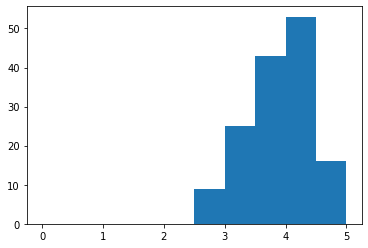

In [17]:
fig,ax=plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'],range=(0,5))
plt.show()

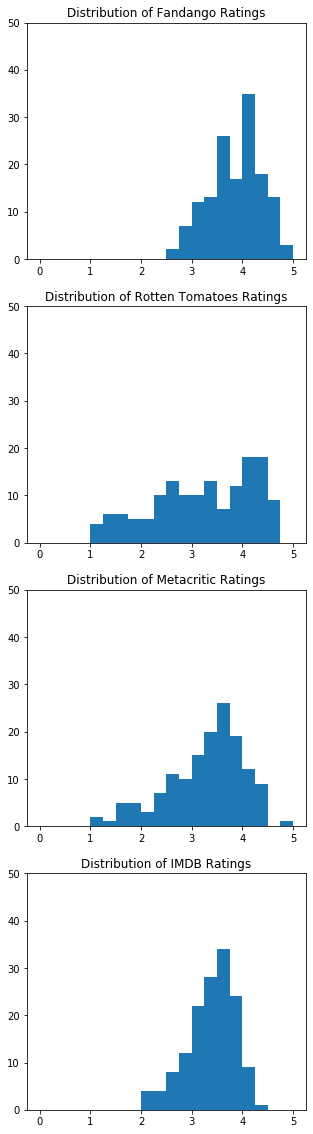

In [19]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'],bins=20,range=(0,5))
ax1.set_ylim(0, 50)
ax1.set_title('Distribution of Fandango Ratings')
ax2.hist(norm_reviews['RT_user_norm'],bins=20,range=(0,5))
ax2.set_ylim(0, 50)
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax3.hist(norm_reviews['Metacritic_user_nom'],bins=20,range=(0,5))
ax3.set_ylim(0, 50)
ax3.set_title('Distribution of Metacritic Ratings')
ax4.hist(norm_reviews['IMDB_norm'],bins=20,range=(0,5))
ax4.set_ylim(0, 50)
ax4.set_title('Distribution of IMDB Ratings')
plt.show()

- Around 50% of user ratings from Fandango fall in the 2 to 4 score range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

## Boxplots

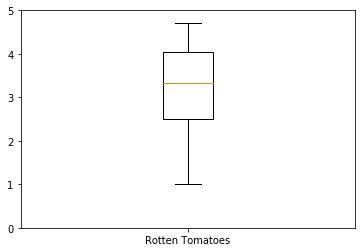

In [22]:
fig,ax=plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0, 5)
ax.set_xticklabels(['Rotten Tomatoes'])
plt.show()

***From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:
- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6***

### Multiple Boxplots

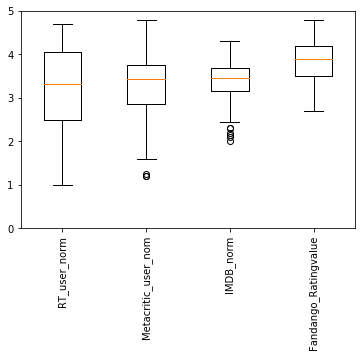

In [23]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig,ax=plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_ylim(0, 5)
ax.set_xticklabels(num_cols, rotation=90)
plt.show()   

***From the boxplot, we can reach the following conclusions:***

- user ratings from Rotten Tomatoes and Metacritic span a larger range of values
- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values
-  There are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called outliers or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.